# Lab 11  Neural Networks
- **Author:** Qutub Khan Vajihi
- **Date:** 14 April 2021
- **Course:** INFO 251: Applied machine learning

In [1]:
import pandas as pd
import numpy as np
import os
import time
from matplotlib import gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import IPython
import tensorflow as tf
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


### Tensorflow 
TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

#### Basics

 A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes. Each element in the Tensor has the same data type, and the data type is always known. 

Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

In [2]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() #We are doing this in order to avoid using the v2 functionality

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
import tensorflow.compat.v1 as tf
tf.Session()

In [10]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.multiply(a,b)
print(c)

Tensor("Mul_1:0", shape=(), dtype=int32)


As expected, you will not see 6! You got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All you did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, you will have to create a session and run it.

In [11]:
sess = tf.Session()
print(sess.run(c))

6


In [12]:
# Basic constant operations
a = tf.constant(2)
b = tf.constant(3)
# or like this, although its recommended to stick with tf constants in this case
c = 4

# Launch the default graph.
with tf.Session() as sess:
    print("a=2, b=3")
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))
    print("Addition with constants: %i" % sess.run(a+c))



a=2, b=3
Addition with constants: 5
Multiplication with constants: 6
Addition with constants: 6


In [13]:
# Random variables and variable initialization
rand_t = tf.random_uniform([5], -10, 10, dtype=tf.int32, seed=0) #we saw something very similar for numpy too!
rand_var_1 = tf.Variable(rand_t)
rand_var_2 = tf.Variable(rand_t)

# or array of zeros (similar for array of ones etc)
rand_var_3 = tf.Variable(tf.zeros([2, 3]))

init = tf.initialize_all_variables()

with tf.Session() as sess:
    # Run every operation with variable input
    sess.run(init)  
    print("random uniform from 0 to 10 {}".format(sess.run(rand_var_1)))
    print("random uniform  from -10 to 10 {}".format(sess.run(rand_var_2)))
    print("constant {}".format(sess.run(rand_var_3)))
    print()
    print("relu activation {}".format(sess.run(tf.nn.relu(rand_var_2))))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
random uniform from 0 to 10 [-9  3  8 -5  3]
random uniform  from -10 to 10 [-9  3  8 -5  3]
constant [[0. 0. 0.]
 [0. 0. 0.]]

relu activation [0 3 8 0 3]


In [14]:
# Bad practice, but you can switch between numpy and tensorflow operations
# Random variables
rand_var_1 = np.random.rand(4,1)
with tf.Session() as sess:
    print("(Using tf sqrt function) relu activation {}".format(sess.run(tf.nn.relu(tf.sqrt(rand_var_1)))))
    print("(Using np sqrt function) relu activation {}".format(sess.run(tf.nn.relu(np.sqrt(rand_var_1)))))


(Using tf sqrt function) relu activation [[0.3804715 ]
 [0.84138408]
 [0.88304709]
 [0.52715652]]
(Using np sqrt function) relu activation [[0.3804715 ]
 [0.84138408]
 [0.88304709]
 [0.52715652]]


Next, you'll also have to know about **placeholders**. A placeholder is an object whose value you can specify only later. To specify values for a placeholder, you can pass in values by using a "feed dictionary" (feed_dict variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session.

In [120]:
# Basic Operations
x = tf.placeholder(tf.int64, name = 'x')
with tf.Session() as sess:
    print(sess.run(2 * x, feed_dict = {x: 3}))

6


In [121]:
# Some more basic Operations with variable as graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))


Addition with variables: 5
Multiplication with variables: 6


In [122]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[4.]])


product1 = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    result1 = sess.run(product1)
    print(result1)
    

[[18.]]


In [123]:
# more functions    
matrix2 = tf.constant([[-2.],[4.]])
product2 = tf.nn.sigmoid(matrix2)

with tf.Session() as sess:
    result2 = sess.run(product2)
    print(result2)

[[0.11920292]
 [0.98201376]]


#### Tensorflow Regression Example

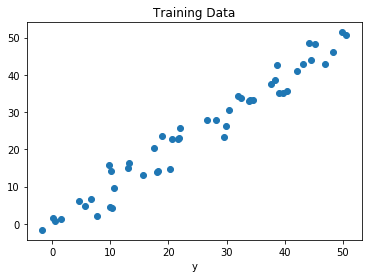

In [127]:
# Example taken from GeeksforGeeks.com
import numpy as np 
# import tensorflow as tf 
import matplotlib.pyplot as plt 

np.random.seed(101) 
tf.set_random_seed(101) 


# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [128]:
X = tf.placeholder(tf.float32) 
Y = tf.placeholder(tf.float32) 
# W and b will be random variables. Since these are variables, we will have to initialize.
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 1000

In [131]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.initialize_all_variables() #tf.global_variables_initializer() can also be used for tf v2

In [132]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        # stochastic, in practice remember to shuffle your data or sample randomly and not sequentially
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        # sess.run(optimizer, feed_dict = {X : x, Y : y}) 
    
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019227 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W 

#### Tensorflow Neural Network Example

In [133]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [134]:
## Import Spiral Data 
fname = 'spiral.txt'
data_points = np.genfromtxt('spiral.txt', usecols=(0, 1))
data_labels = np.genfromtxt('spiral.txt', dtype=str, usecols=(2))
colors = np.zeros(len(data_labels))
for i in range(len(data_labels)):
    if(data_labels[i] == 'Red'):
        colors[i] = 1
        
# One hot encoding of labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Just for plotting purposes later on
data_labels_temp = onehot_encoded 
colors = np.zeros(len(data_labels_temp))
for i in range(len(data_labels_temp)):
    if(str(int(data_labels_temp[i, 1])) == '1'):
        colors[i] = 1


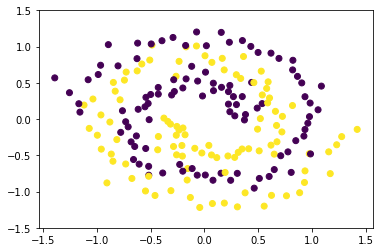

In [136]:
# Plot Spiral        
plt.scatter(data_points[:,0], data_points[:,1], c=colors)
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
plt.show()

In [185]:
# train test split
from sklearn.model_selection import train_test_split


train_x, test_x, train_y, test_y = train_test_split(
     data_points, onehot_encoded, test_size=0.2, random_state=42)

print("train X size is {}".format(train_x.shape))
print("test X size is {}".format(test_x.shape))


train X size is (160, 2)
test X size is (40, 2)


In [186]:
## Initialize Training Parameters
learning_rate = 0.1
num_steps = 4
batch_size = 40
EPOCHS = 100

# Neural Network Parameters
n_hidden_1 = 80 # 1st layer number of neurons
num_input = 2 # Spiral data input 2-D points
num_classes = 2 # Total classes (red or black)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [187]:
## Initialize Layer Weights
# Store layers weight & bias
weights = {
    'w1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

## Create model
def neural_net(x):
    # Hidden fully connected layer. You can use different activation functions here apart from tanh. 
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer



In [188]:
## Construct model
logits = neural_net(X)

# Define loss
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Set the optimizer as Adam. Adam optimizer is a SGD method that is based on adaptive estimation 
# of first-order and second-order moments. This is the most commonly used one in DL. There are many more optimizers out there. 
# Refer to this for more information - https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))# cast to new data type


In [189]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


## Start training
sess=tf.Session()
test_acc = []
train_acc = []


# Run the initializer
sess.run(init)
for kk in range(1,EPOCHS):
    for step in range(1, num_steps+1):
        batch_x, batch_y = train_x[(batch_size)*(step-1)+1:batch_size*(step),],train_y[(batch_size)*(step-1)+1:batch_size*(step),]  #mnist.train.next_batch(batch_size)
        # Run optimization (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})

    loss = sess.run(loss_op, feed_dict={X: train_x, Y: train_y})
    print("Epoch " + str(kk) + ", Training Loss= " + "{:.4f}".format(loss))
    acc_train = sess.run(correct_pred, feed_dict={X: train_x, Y: train_y})
    acc_train = np.sum(acc_train)/len(acc_train)
    train_acc.append(acc_train)
    print("Training Accuracy=" + str(acc_train))
    acc_test = sess.run(correct_pred, feed_dict={X: test_x, Y: test_y})
    acc_test = np.sum(acc_test)/len(acc_test)
    test_acc.append(acc_test)
    print("Test Accuracy=" + str(acc_test))


Epoch 1, Training Loss= 1.9482
Training Accuracy=0.63125
Test Accuracy=0.6
Epoch 2, Training Loss= 1.1528
Training Accuracy=0.58125
Test Accuracy=0.5
Epoch 3, Training Loss= 1.1029
Training Accuracy=0.56875
Test Accuracy=0.6
Epoch 4, Training Loss= 0.8659
Training Accuracy=0.61875
Test Accuracy=0.625
Epoch 5, Training Loss= 0.8328
Training Accuracy=0.56875
Test Accuracy=0.525
Epoch 6, Training Loss= 0.9880
Training Accuracy=0.63125
Test Accuracy=0.575
Epoch 7, Training Loss= 0.7292
Training Accuracy=0.6125
Test Accuracy=0.575
Epoch 8, Training Loss= 0.6887
Training Accuracy=0.6625
Test Accuracy=0.575
Epoch 9, Training Loss= 0.6454
Training Accuracy=0.675
Test Accuracy=0.7
Epoch 10, Training Loss= 0.6186
Training Accuracy=0.6375
Test Accuracy=0.525
Epoch 11, Training Loss= 0.6232
Training Accuracy=0.675
Test Accuracy=0.7
Epoch 12, Training Loss= 0.6019
Training Accuracy=0.6625
Test Accuracy=0.55
Epoch 13, Training Loss= 0.6281
Training Accuracy=0.66875
Test Accuracy=0.65
Epoch 14, Train

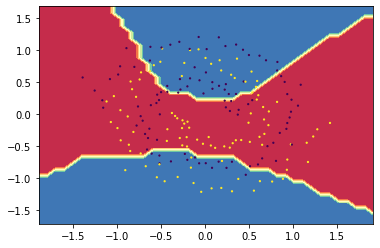

In [184]:
X = data_points
W0 = sess.run(weights)['w1']
B0 = sess.run(biases)['b1']
W1 = sess.run(weights)['out']
B1 = sess.run(biases)['out']
def neural_net_plot(X, W0, W1, B0, B1):
    # Hidden fully connected layer 
    layer_1 = np.maximum(np.matmul(X, W0) + B0, 0)
    # Output fully connected layer with a neuron for each class
    logits = np.matmul(layer_1, W1) + B1
    out_layer = np.argmax(logits, 1)
    return out_layer


# Helper function to plot a decision boundary.
def plot_decision_boundary(neural_net_plot, X, W0,W1, B0,B1, col):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x_min = np.float32(x_min)
    x_max = np.float32(x_max)
    y_min = np.float32(y_min)
    y_max = np.float32(y_max)
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    xx = np.float32(xx)
    yy = np.float32(yy)
    Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0,W1, B0,B1)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=1.5, c=col)
    plt.show()


plot_decision_boundary(neural_net_plot, X, W0,W1, B0,B1, colors)

There are many hyperparameters you should be tuning for a net. Most important ones being learning rate, number of layers, their size, choice of activation function and many more. Above is a simple version without any careful cross-validation, but you should refer to documentation and find efficient ways for tuning our model to get the best results. 

Neural Networks are great models but can turn into a black box very very soon if you do not understand what is happening under the hood. Also, as a sidenote, there are many other modern ML/DL libraries like Torch and keras that abstract away many of steps we showed above. Feel free to try them out too to build some exciting DL models :)